In [0]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1Q9dgOEO7qD-52Ku6BKVK4dL0KtDn0hJf"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Breast_Cancer_Dataset.csv')        # replace the file name with your file

In [0]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import random;
import numpy as np;

In [29]:
C = pd.read_csv('Breast_Cancer_Dataset.csv')
C

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

In [30]:
#Convert diagnosis to Benign and Malignant to codes
C['diagnosis']= C['diagnosis'].astype('category').cat.codes
C

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [31]:
#drop the id and the extraneous unnamed last column
C = C.drop(labels = ['id', 'Unnamed: 32'], axis = 1)
C

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
#Create the training set
#Shuffle and copy first 80 percent rows as training set. Extract the dianosis column as the target (train_sety)
from sklearn.utils import shuffle
C = shuffle(C);
num_of_Rows = C.shape[0];
train_Set = C[:int(np.round(num_of_Rows*0.8))]
train_Sety = train_Set['diagnosis'];
train_Setx = train_Set.drop(columns = ['diagnosis'])

#copy last 80 percent rows as test set. Extract the dianosis column as the target (test_sety)
test_Set = C[int(np.round(num_of_Rows*0.8)):]
test_Sety = test_Set['diagnosis'];
test_Setx = test_Set.drop(columns = ['diagnosis'])

In [33]:
train_Setx

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
499,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,0.5904,1.2160,4.206,75.09,0.006666,0.02791,0.04062,0.014790,0.01117,0.003727,23.860,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999
535,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,0.06251,0.6986,0.9901,4.706,87.78,0.004578,0.02616,0.04005,0.014210,0.01948,0.002689,24.300,25.48,160.20,1809.0,0.1268,0.3135,0.4433,0.21480,0.3077,0.07569
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,0.3389,1.4390,2.344,33.58,0.007257,0.01805,0.01832,0.010330,0.01694,0.002001,18.130,25.45,117.20,1009.0,0.1338,0.1679,0.1663,0.09123,0.2394,0.06469
543,13.21,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,0.05781,0.2351,1.5970,1.539,17.85,0.004973,0.01372,0.01498,0.009117,0.01724,0.001343,14.370,37.17,92.48,629.6,0.1072,0.1381,0.1062,0.07958,0.2473,0.06443
212,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.014070,0.04783,0.004476,28.110,18.47,188.50,2499.0,0.1142,0.1516,0.3201,0.15950,0.1648,0.05525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.03994,0.05554,0.016950,0.02428,0.003535,22.820,21.32,150.60,1567.0,0.1679,0.5090,0.7345,0.23780,0.3799,0.09185
466,13.14,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,0.06020,0.3152,0.7884,2.312,27.40,0.007295,0.03179,0.04615,0.012540,0.01561,0.003230,14.800,25.46,100.90,689.1,0.1351,0.3549,0.4504,0.11810,0.2563,0.08174
445,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,0.06850,0.2623,1.2040,1.865,19.39,0.008320,0.02025,0.02334,0.016650,0.02094,0.003674,12.980,30.36,84.48,513.9,0.1311,0.1822,0.1609,0.12020,0.2599,0.08251
116,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,0.3132,0.9789,3.280,16.94,0.018350,0.06760,0.09263,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722


In [34]:
train_Sety

499    1
535    1
363    0
543    0
212    1
      ..
45     1
466    0
445    0
116    0
392    1
Name: diagnosis, Length: 455, dtype: int8

In [35]:
#show data columns
C.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#Assignment 4.3 (1)
Fill in the blanks in following code

In [0]:
train_Setx = train_Setx.to_numpy()# is used to return a NumPy ndarray
test_Setx = test_Setx.to_numpy()  # is used to return a NumPy ndarray
train_Sety = train_Sety.to_numpy()# is used to return a NumPy ndarray
test_Sety = test_Sety.to_numpy()  # is used to return a NumPy ndarray

#random initialization of wirghts and normalization
k =0;
theta = [None] * (train_Setx.shape[1]+1);
theta[k] = random.uniform(-1,1);
M = np.mean(train_Setx,axis = 0)
S = np.std(train_Setx,axis = 0)

for i in range(0,train_Setx.shape[1]):
  theta[k+1] = random.uniform(-1,1);
  train_Setx[:,i] = np.divide((train_Setx[:,i]- M[k]),S[k])
  test_Setx[:,i] = np.divide((test_Setx[:,i]- M[k]),S[k])   
  k = k+1; 
theta[0] = random.uniform(-1,1);
train_Setx = np.append(np.ones([train_Setx.shape[0],1]), train_Setx, axis=1)
test_Setx = np.append(np.ones([test_Setx.shape[0],1]), test_Setx, axis=1)

In [37]:
train_Setx

array([[ 1.        ,  1.81608777,  0.45095612, ...,  1.48788555,
        -0.65309116,  0.30863174],
       [ 1.        ,  1.80495342,  0.36314479, ...,  1.54109574,
         0.3098801 , -0.45894545],
       [ 1.        ,  0.67760008, -0.23073709, ..., -0.33752806,
        -0.79181064, -1.04938944],
       ...,
       [ 1.        , -0.57779834,  1.29440703, ...,  0.10290029,
        -0.46114212, -0.09287017],
       [ 1.        , -1.42400924, -0.81537567, ..., -1.13978571,
        -1.98866939, -0.37682006],
       [ 1.        ,  0.39645764,  0.15748142, ...,  1.50004787,
         0.48731199,  0.94792155]])

#Assignment 4.3 (1)
Fill in the blanks in the following code

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


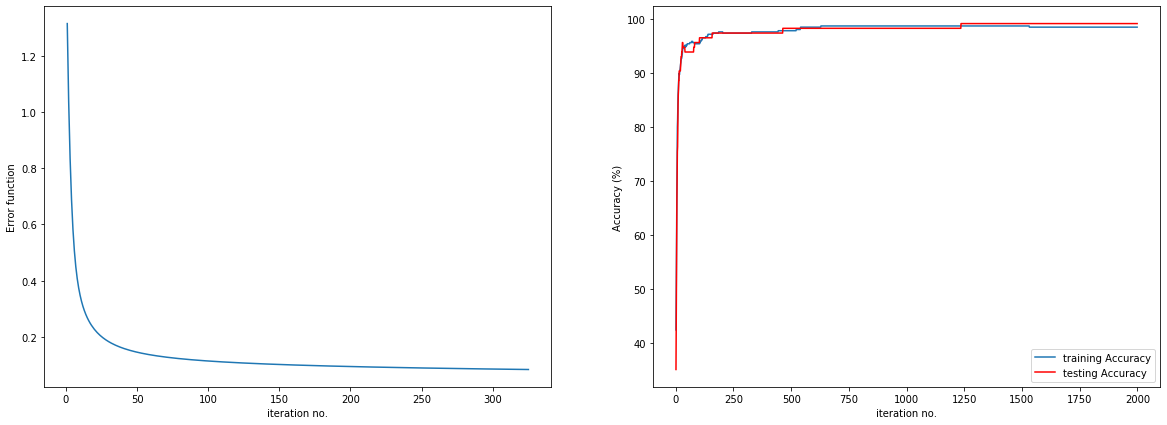

In [38]:
#Cost computation and weight updation
iteration_Nos = range(1, 2000)
training_Accuracy = [None] * len(iteration_Nos)
testing_Accuracy = [None] * len(iteration_Nos)
err_F = [None] * len(iteration_Nos)
m = train_Setx.shape[0];
alpha = 0.1;

for i in iteration_Nos:
    S_train =  np.divide(1, (1 + np.exp(-(train_Setx.dot(theta)))));
    S_test =  np.divide(1, (1 + np.exp(-(test_Setx.dot(theta)))));
    err_F[i-1] = -(1 / m) * np.sum((train_Sety * np.log(S_train)) + ((1 -train_Sety) * np.log(1 - S_train)) );
    theta = theta - (alpha/m) * ((S_train - train_Sety).dot(train_Setx));
    S_train[S_train >= 0.5]=1
    S_train[S_train<0.5] =0;
    S_test[S_test >= 0.5]=1
    S_test[S_test < 0.5] =0;
    training_Accuracy[i-1] = 100*np.count_nonzero(S_train == train_Sety)/train_Sety.shape[0];
    testing_Accuracy[i-1] = 100*np.count_nonzero(S_test == test_Sety)/test_Sety.shape[0];

plt.figure(figsize = [20,7])   
plt.subplot(1,2,1)
plt.plot(iteration_Nos, err_F)
plt.xlabel('iteration no.')
plt.ylabel('Error function')
ax = plt.subplot(1,2,2)
line1, =ax.plot(iteration_Nos, training_Accuracy)
line2, =ax.plot(iteration_Nos, testing_Accuracy, 'r')
plt.xlabel('iteration no.')
plt.ylabel('Accuracy (%)')
plt.legend((line1, line2), ('training Accuracy', 'testing Accuracy'))

In [39]:
print('Training Accuracy = ', training_Accuracy[-1], '% \nTesting Accuracy = ', testing_Accuracy[-1], '%')

Training Accuracy =  98.46153846153847 % 
Testing Accuracy =  99.12280701754386 %
